# Problem Statement :

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here we will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

# Aim :

__To build a machine learning model to predict the price of the flight ticket.__

Given :
        
        Size of training set: 10683 records

        Size of test set: 2671 records

In [1]:
# Importing the first required libraries

import pandas as pd
import warnings
warnings.filterwarnings('ignore')

__Datasets :__
In this project we have 2 separate datasets, one for training purpose and one for testing purpose.

In [2]:
# Getting the datasets

trainset=pd.read_excel("Flight_Train.xlsx")
testset=pd.read_excel("Flight_Test.xlsx")

In [3]:
trainset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Now let's understand the various features of this dataset :

__Airline:__ The name of the airline.

__Date_of_Journey:__ The date of the journey

__Source:__ The source from which the service begins.

__Destination:__ The destination where the service ends.

__Route:__ The route taken by the flight to reach the destination.

__Dep_Time:__ The time when the journey starts from the source.

__Arrival_Time:__ Time of arrival at the destination.

__Duration:__ Total duration of the flight.

__Total_Stops:__ Total stops between the source and destination.

__Additional_Info:__ Additional information about the flight

__Price:__ The price of the ticket

# Exploratory Data Analysis for Train Dataset 

In [4]:
# Checking the features of the train dataset

trainset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
# Checking shape of the train dataset

trainset.shape

(10683, 11)

__The train dataset has 10683 rows and 11 columns.__

In [6]:
# Checking datatype of the train dataset

trainset.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

__So, all the features are object datatype, which are in string format, except for the 'Price' is int datatype.__

In [7]:
# Getting more information about the dataset

trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


__Here we can observe that all the 10683 rows, for all the columns, are non null, that is there are no null values.__

__And memory used by the dataset is 918.2+ KB.__

In [8]:
# Checking for null values in train dataset

trainset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

__There are only 2 null values in the train dataset, so it can be dropped easily.__

In [9]:
trainset.dropna(inplace=True)

In [10]:
# Shape of train dataset after dropping null values :-

trainset.shape

(10682, 11)

In [11]:
trainset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

__Successfully dropped the null values.__

__We can also visualize and check :__

In [12]:
# First importing the seaborn library

import seaborn as sns

<AxesSubplot:>

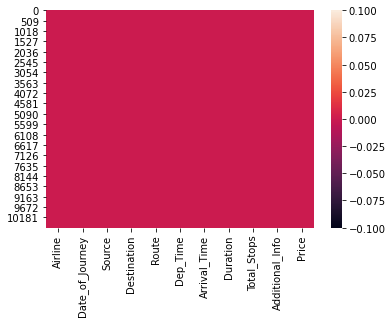

In [13]:
sns.heatmap(trainset.isnull())

__From the above heatmap visualization we can observe that there are no white spaces, hence no null values.__

In [14]:
trainset.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

__We have some categorical data here, lets check their value counts :__

In [15]:
# Checking the value counts of each columns
for i in trainset.columns:
    print(trainset[i].value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     2

__These are some popular destinations passengers are travelling to. But there are repeated values for 'Delhi' and 'New Delhi', which are basically the same locations. Hence it can be replaced with one feature.__

In [16]:
trainset["Destination"]=trainset["Destination"].replace({'New Delhi': 'Delhi'})

In [17]:
trainset.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

__Successfully replaced.__

# Feature Engineering :

In the dataset we can observe columns such as __"Date_of_Journey", "Route", "Dep_Time", "Arrival_Time",	"Duration"__ are not in a proper format which can be used for analysis and machine learning models. 

Therefore we need to convert them into timestamps using __datetime__ library for proper analysis and prediction.

In [18]:
trainset.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

__From "Date_of_Journey", we will extract only the date and month. This data is specifically for the year 2019 only, so no need to extract year.__

In [19]:
# To extract the day of journey

trainset['Journey_Day']= pd.to_datetime(trainset.Date_of_Journey, format="%d/%m/%Y").dt.day

In [20]:
# To extract the month of journey

trainset['Journey_Month']= pd.to_datetime(trainset.Date_of_Journey, format="%d/%m/%Y").dt.month

In [21]:
trainset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


__Separate columns for day and month of journey are added to the train dataset.__

__Hence, "Date_of_Journey" can be dropped.__

In [22]:
trainset.drop(['Date_of_Journey'],axis=1,inplace=True)

In [23]:
trainset.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


__Successfully dropped.__

__Now similarly, we can extract values from "Dep_Time"__

In [24]:
trainset.Dep_Time

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10682, dtype: object

In [25]:
# To extract the hour value

trainset['Dep_Hour']= pd.to_datetime(trainset.Dep_Time).dt.hour

In [26]:
# To extract the minute value

trainset['Dep_Min']= pd.to_datetime(trainset.Dep_Time).dt.minute

In [27]:
trainset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


__Separate columns for hour and minute of departure are added to the train dataset.__

__Hence, "Dep_Time" can be dropped.__

In [28]:
trainset.drop(['Dep_Time'],axis=1,inplace=True)

In [29]:
trainset.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


__Successfully dropped.__

__Now similarly, we can extract values from "Arrival_Time"__

In [30]:
trainset.Arrival_Time

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10682, dtype: object

In [31]:
# To extract the hour value

trainset['Arrival_Hour']= pd.to_datetime(trainset.Arrival_Time).dt.hour

In [32]:
# To extract the minute value

trainset['Arrival_Min']= pd.to_datetime(trainset.Arrival_Time).dt.minute

In [33]:
trainset.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


__2 Separate columns for hour and minute of arrival are added to the train dataset.__

__Hence, "Arrival_Time" can be dropped.__

In [34]:
trainset.drop(['Arrival_Time'],axis=1,inplace=True)

In [35]:
trainset.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10


__Successfully dropped.__

__Now we have to extract values from "Duration".__

In [36]:
# First assigning Duration column values into a list :

duration=list(trainset['Duration'])

In [37]:
duration = list(trainset["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    # Extracts minutes from duration

In [38]:
trainset["Duration_hours"] = duration_hours
trainset["Duration_mins"] = duration_mins

In [39]:
trainset.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


__2 Separate columns for hour and minute of duration are added to the train dataset.__

__Hence, "Duration" can be dropped.__

In [40]:
trainset.drop(['Duration'],axis=1,inplace=True)

In [41]:
trainset.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


__Successfully dropped.__

__Handling "Total_Stops" column :__

In [42]:
trainset.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

__Here we can observe 4 uniques values : non-stop, 1 stop, 2 stops, 3 stops, 4 stops.__
    
__We can replace these values with single digits for easy analysis, because while using label  encoder to convert them, it might assign random values.__

In [43]:
trainset.Total_Stops.replace(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],[0,1,2,3,4],inplace=True)

In [44]:
trainset.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

__Successfully replaced.__

# Handling Categorical Data :

We have 3 categorical features to handle :
    
    1. Airline
    2. Source
    3. Destination

__"Airline" :__

In [45]:
trainset.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

__Here we can observe repeated values for some airlines, which are Jet Airways, Multiple carriers, and Vistara. Hence these can be replaced with one airline only.__

In [46]:
trainset["Airline"]=trainset["Airline"].replace({'Jet Airways Business': 'Jet Airways'})
trainset["Airline"]=trainset["Airline"].replace({'Multiple carriers Premium economy': 'Multiple carriers'})
trainset["Airline"]=trainset["Airline"].replace({'Vistara Premium economy': 'Vistara'})

In [47]:
trainset.Airline.value_counts()

Jet Airways          3855
IndiGo               2053
Air India            1751
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

__Successfully replaced.__

__Here Airline is nominal data, that is, data is not in any specific order, hence we use OneHotEncoder.__

In [48]:
Airline=trainset['Airline']

In [49]:
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


__And we obtained separate columns for all the airlines.__

In [50]:
import matplotlib.pyplot as plt

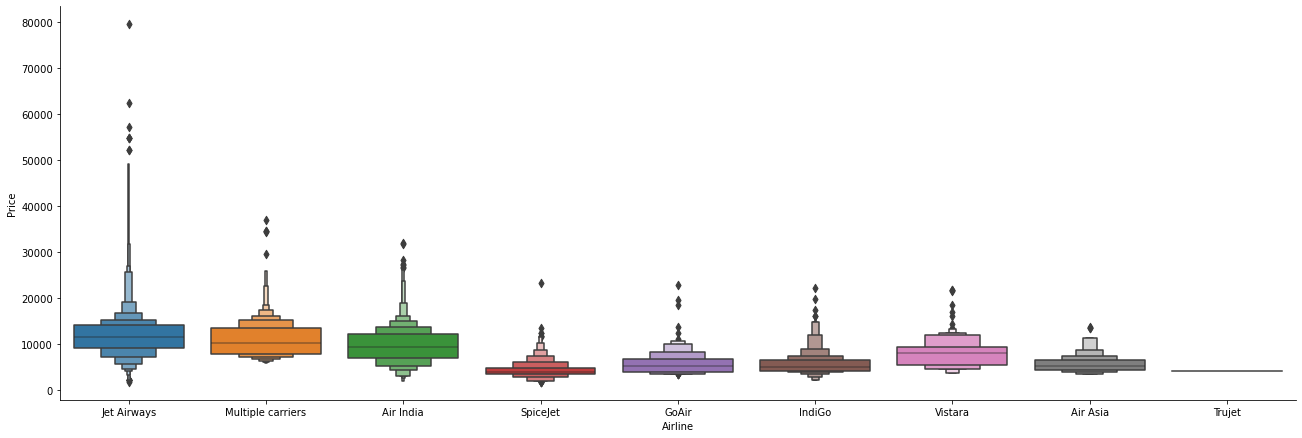

In [51]:
# Airline vs Price

sns.catplot(y = "Price", x = "Airline", data = trainset.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

__"Source" :__

In [52]:
trainset.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

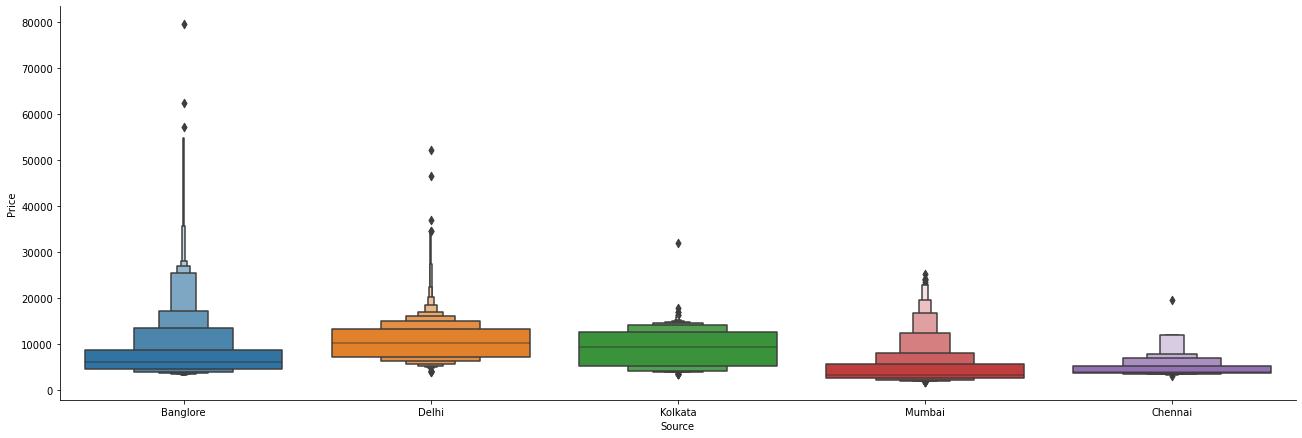

In [53]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = trainset.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [54]:
Source=trainset['Source']
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


__And we obtained separate columns for all the source places.__

__"Destination" :__

In [55]:
trainset.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

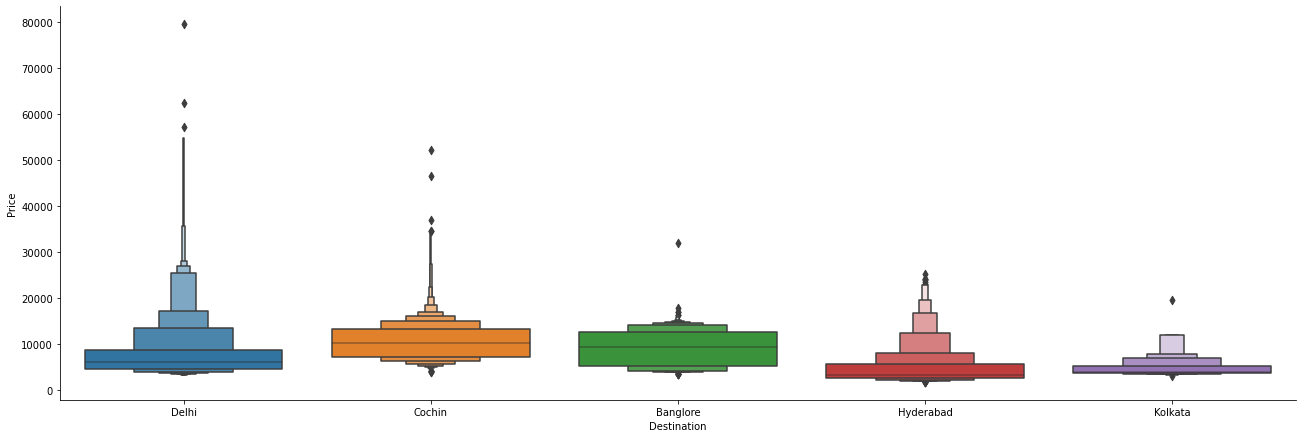

In [56]:
# Destination vs Price

sns.catplot(y = "Price", x = "Destination", data = trainset.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [57]:
Destination=trainset['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


__And we obtained separate columns for all the destination places.__

__Now lets merge all the 3 dataframes into our train dataset :__

In [58]:
trainset=pd.concat([trainset,Airline,Source,Destination],axis=1)

In [59]:
trainset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,...,Trujet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,IndiGo,Banglore,Delhi,BLR → DEL,0,No info,3897,24,3,22,...,0,0,0,0,0,0,0,1,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,...,0,0,0,0,1,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,...,0,0,0,1,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,...,0,0,0,0,1,0,0,0,0,0
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,...,0,0,0,0,0,0,0,1,0,0


Therefore now we can drop those 3 columns from the dataset, as we already encoded them.

'Route' feature is similar to 'Total_Stops', as the route also gives total number of stopages during the whole journey, so it can be dropped.

'Additional_Info' contains almost 80% no_info, hence can be dropped.

In [60]:
trainset.drop(['Airline','Source','Destination','Route','Additional_Info','Trujet'],axis=1,inplace=True)

In [61]:
trainset.head(1)

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,...,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,1,0,0


__Successfully dropped.__

# Univariate Analysis :

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

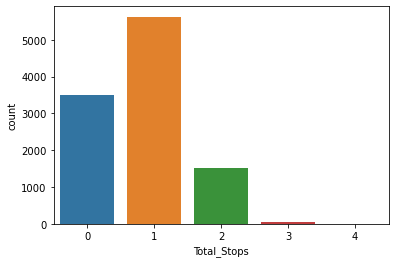

In [62]:
sns.countplot(x='Total_Stops', data=trainset)

__Majority of the flights are with one stop, followed by non-stop flights.__

<AxesSubplot:xlabel='Price', ylabel='Density'>

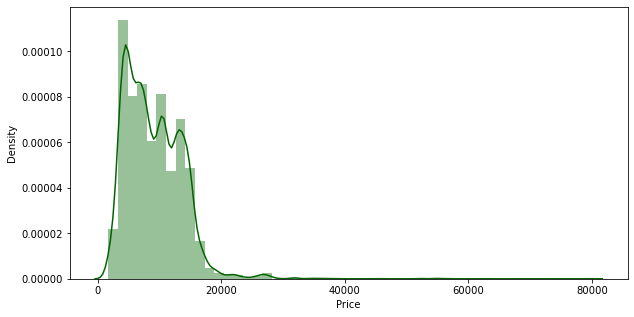

In [63]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Price'], color='darkgreen')

__The target variable 'Price' is skewed right.__

<AxesSubplot:xlabel='Journey_Day', ylabel='Density'>

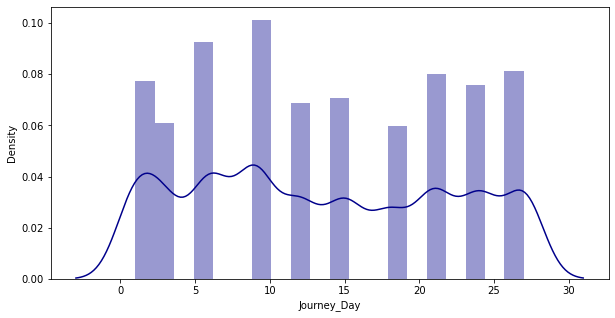

In [64]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Journey_Day'], color='darkblue')

<AxesSubplot:xlabel='Journey_Month', ylabel='Density'>

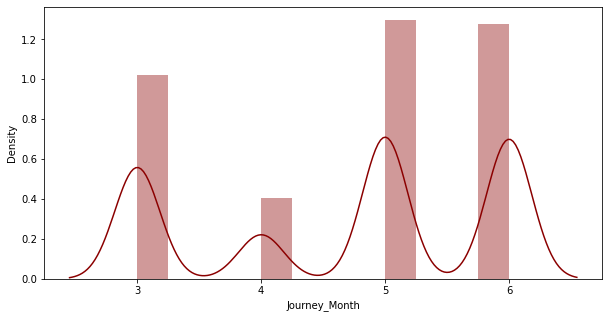

In [65]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Journey_Month'], color='darkred')

__People are mostly travelling in the month of May.__

<AxesSubplot:xlabel='Dep_Hour', ylabel='Density'>

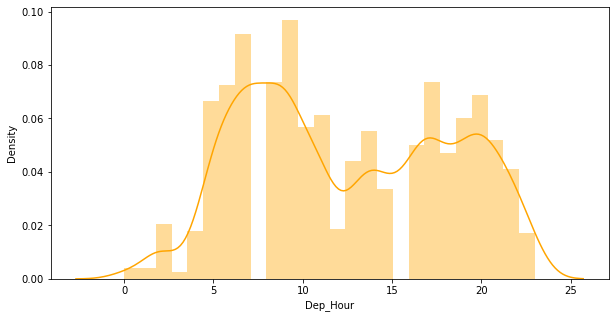

In [66]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Dep_Hour'], color='orange')

__People are mostly getting tickets in the morning hours.__

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Density'>

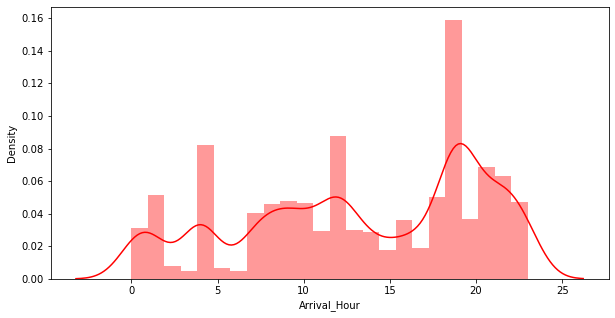

In [67]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Arrival_Hour'], color='red')

Passengers are arriving at late hours and early departures[as seen in the above graph], which indicates longer journeys.

<AxesSubplot:xlabel='Duration_hours', ylabel='Density'>

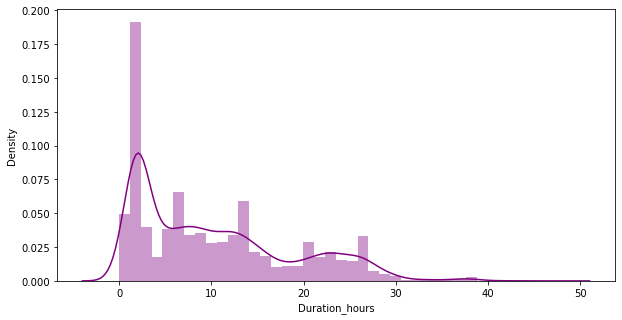

In [68]:
plt.figure(figsize=(10,5))
sns.distplot(trainset['Duration_hours'], color='purple')

__Here we can observe some right skewed data.__

# Bivariate Analysis :

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

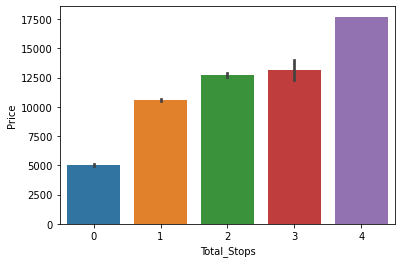

In [69]:
sns.barplot(data=trainset, x='Total_Stops',y='Price')

__With the increase in layovers during the journey, price also increases. Price of tickets are lowest with non stop flights.__

<AxesSubplot:xlabel='Journey_Day', ylabel='Price'>

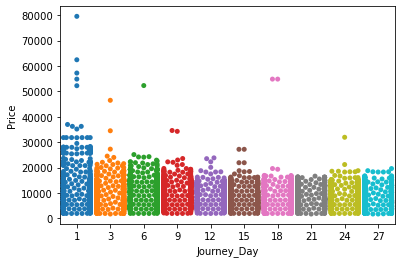

In [70]:
sns.swarmplot(data=trainset, x='Journey_Day',y='Price')

__People are mostly travelling in the first week of the month and due to the spread of datapoints we can say that outliers can be present.__

<AxesSubplot:xlabel='Journey_Month', ylabel='Price'>

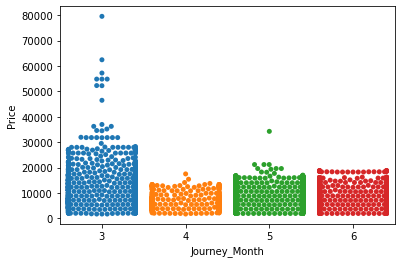

In [71]:
sns.swarmplot(data=trainset, x='Journey_Month',y='Price')

__People are most travelling in the month of March.__

<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

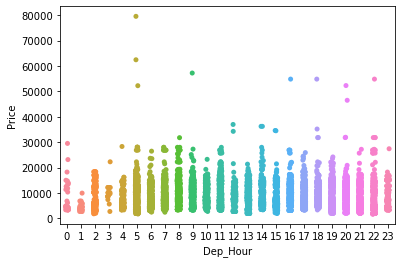

In [72]:
sns.stripplot(data=trainset, x='Dep_Hour',y='Price')

__Price can be little less with early departure hours, and outliers can be observed here.__

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Price'>

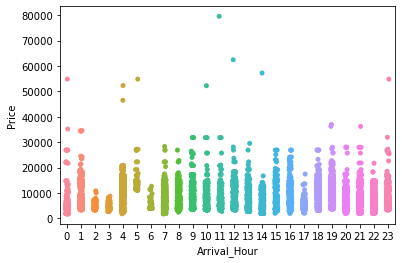

In [73]:
sns.stripplot(data=trainset, x='Arrival_Hour',y='Price')

__Price of the tickets can be less for early arrival hours. And outliers can also be observed here.__

<AxesSubplot:xlabel='Duration_hours', ylabel='Price'>

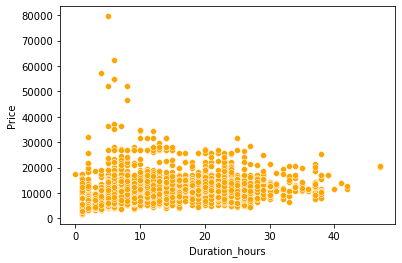

In [74]:
sns.scatterplot(data=trainset, x='Duration_hours',y='Price', color='orange')

__Mostly flight journeys takes 3 to 5 hours of duration.__

# Detecting Outliers :

Total_Stops             AxesSubplot(0.125,0.787927;0.168478x0.0920732)
Price                AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
Journey_Day          AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
Journey_Month        AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
Dep_Hour                AxesSubplot(0.125,0.677439;0.168478x0.0920732)
Dep_Min              AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
Arrival_Hour         AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
Arrival_Min          AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
Duration_hours          AxesSubplot(0.125,0.566951;0.168478x0.0920732)
Duration_mins        AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
Air India            AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
GoAir                AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
IndiGo                  AxesSubplot(0.125,0.456463;0.168478x0.0920732)
Jet Airways          AxesSubplot(0.327174,0.456463;0.168478x0.0920732)
Multip

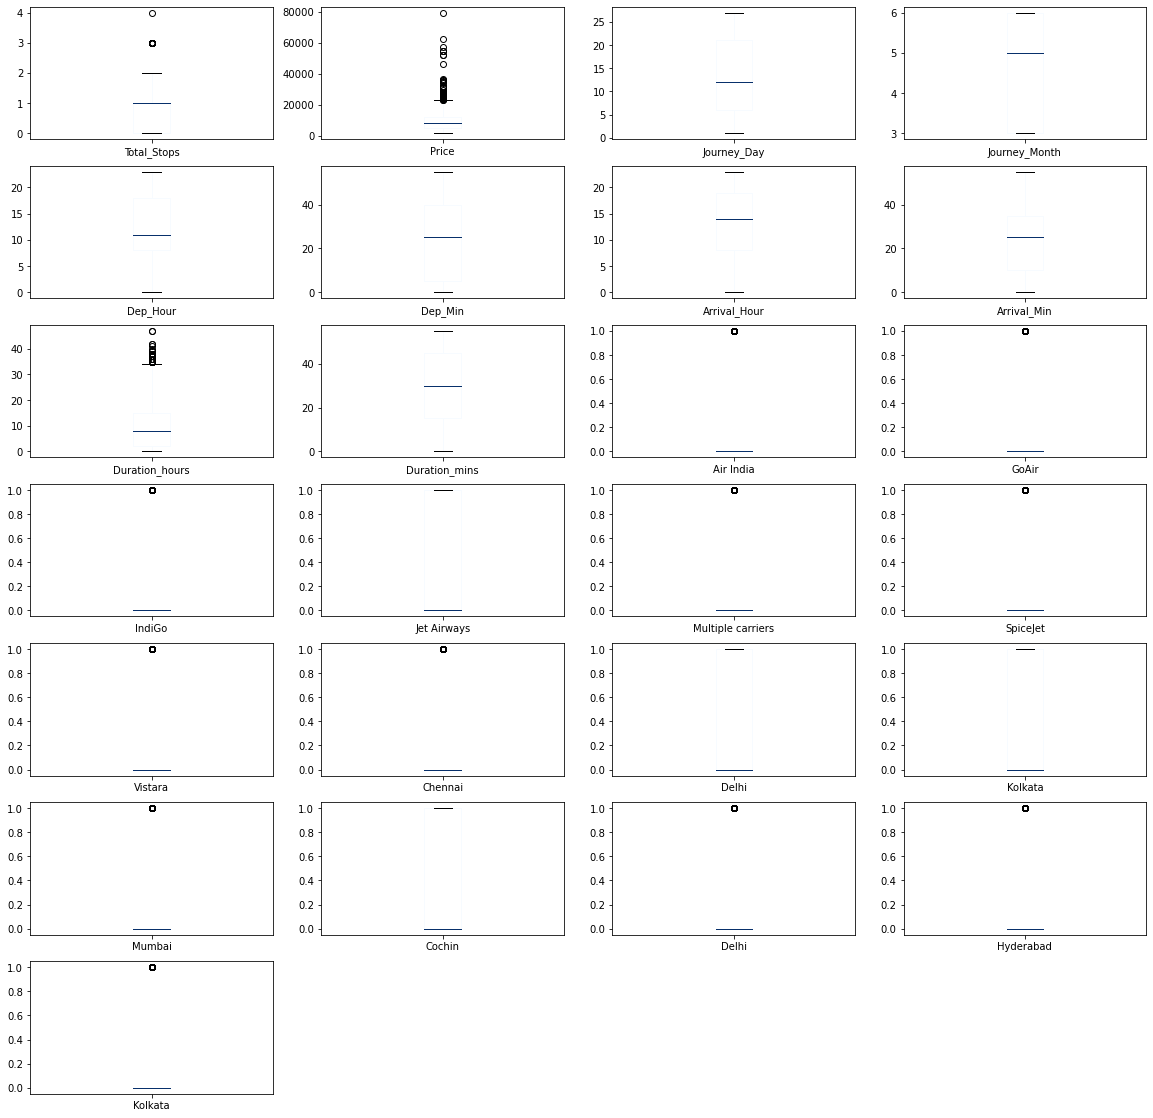

In [75]:
trainset.plot(kind='box', subplots=True, layout=(7,4), figsize=(20,20), colormap='Blues')

Through this visualizations, the outliers are clearly visible.



In [76]:
# Importing required zscore library

from scipy.stats import zscore
import numpy as np

In [77]:
z=np.abs(zscore(trainset))

In [78]:
threshold=3

In [79]:
trainset_new=trainset[(z<3).all(axis=1)]

In [80]:
print('Shape of original dataframe', trainset.shape)

Shape of original dataframe (10682, 25)


In [81]:
print('Shape of dataframe after outliers removal', trainset_new.shape)

Shape of dataframe after outliers removal (8244, 25)


# Skewness :

In [82]:
trainset.skew().sort_values()

Journey_Month       -0.387409
Arrival_Hour        -0.370146
Duration_mins       -0.090680
Arrival_Min          0.110945
Dep_Hour             0.112924
Journey_Day          0.118174
Dep_Min              0.167234
Cochin               0.304968
Delhi                0.304968
Total_Stops          0.317109
Jet Airways          0.579406
Duration_hours       0.851197
Kolkata              1.043321
Delhi                1.456574
IndiGo               1.562601
Price                1.812405
Air India            1.815902
Multiple carriers    2.442274
SpiceJet             3.185036
Hyderabad            3.521217
Mumbai               3.521217
Vistara              4.383432
Chennai              5.008071
Kolkata              5.008071
GoAir                7.217685
dtype: float64

In [83]:
trainset["Duration_hours"] = np.log1p(trainset["Duration_hours"])

In [84]:
trainset.skew().sort_values()

Journey_Month       -0.387409
Arrival_Hour        -0.370146
Duration_hours      -0.099961
Duration_mins       -0.090680
Arrival_Min          0.110945
Dep_Hour             0.112924
Journey_Day          0.118174
Dep_Min              0.167234
Cochin               0.304968
Delhi                0.304968
Total_Stops          0.317109
Jet Airways          0.579406
Kolkata              1.043321
Delhi                1.456574
IndiGo               1.562601
Price                1.812405
Air India            1.815902
Multiple carriers    2.442274
SpiceJet             3.185036
Hyderabad            3.521217
Mumbai               3.521217
Vistara              4.383432
Chennai              5.008071
Kolkata              5.008071
GoAir                7.217685
dtype: float64

Removed skewness in Duration_hours as it is a numerical column.

# Variance Inflation Factor : 

__<font color=orange>It helps us to eliminate multi co-linearity.</font>__

___Spliting the dataset :___

In [85]:
# Data part

x=trainset.drop(['Price'],axis=1)

In [86]:
# Target

y=trainset.Price

In [87]:
# Importing required library for variance inflation factor.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [89]:
vif_calc()

    VIF Factor           Features
0     3.840781        Total_Stops
1     1.022100        Journey_Day
2     1.111901      Journey_Month
3     1.062839           Dep_Hour
4     1.107597            Dep_Min
5     1.083017       Arrival_Hour
6     1.138203        Arrival_Min
7     4.407574     Duration_hours
8     1.147657      Duration_mins
9     6.166244          Air India
10    1.602143              GoAir
11    6.296803             IndiGo
12    9.318805        Jet Airways
13    4.906609  Multiple carriers
14    3.433420           SpiceJet
15    2.574583            Vistara
16         inf            Chennai
17         inf              Delhi
18   27.883145            Kolkata
19         inf             Mumbai
20         inf             Cochin
21   19.127627              Delhi
22         inf          Hyderabad
23         inf            Kolkata


# Feature Scaling :
__<font color=orange>To transform the dataset into same format, so that we have a uniform dataset.</font>__

In [90]:
# Importing required scaler library

from sklearn.preprocessing import StandardScaler

In [91]:
scale=StandardScaler()
x=pd.DataFrame(scale.fit_transform(x), columns=x.columns)
x.head(10)

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,...,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,-1.220666,1.237288,-1.467402,1.654154,-0.234950,-1.800436,-0.890014,-1.186286,1.279041,-0.442785,...,-0.287972,-0.217382,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,1.965219,-0.264206,-0.192319
1,1.741432,-1.475307,0.250289,-1.303113,1.363607,-0.050909,-0.587094,-0.021232,-0.196319,2.258432,...,-0.287972,-0.217382,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.508849,-0.264206,-0.192319
2,1.741432,-0.531796,1.109135,-0.607286,0.031476,-1.363054,0.018745,1.067161,-1.671678,-0.442785,...,-0.287972,-0.217382,-0.192319,1.164018,-0.606266,-0.264206,1.164018,-0.508849,-0.264206,-0.192319
3,0.260383,-0.177979,0.250289,0.958326,-1.034229,1.407030,0.321664,-0.362948,-0.196319,-0.442785,...,-0.287972,-0.217382,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.508849,-0.264206,-0.192319
4,0.260383,-1.475307,-1.467402,0.610412,1.363607,1.115442,0.624584,-0.579514,0.983969,-0.442785,...,-0.287972,-0.217382,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,1.965219,-0.264206,-0.192319
5,-1.220666,1.237288,1.109135,-0.607286,-1.300655,-0.342497,0.018745,-1.186286,-0.196319,-0.442785,...,3.472561,-0.217382,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.508849,-0.264206,-0.192319
6,0.260383,-0.177979,-1.467402,0.958326,1.630034,-0.488291,0.018745,0.802105,0.098753,-0.442785,...,-0.287972,-0.217382,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,1.965219,-0.264206,-0.192319
7,0.260383,-1.475307,-1.467402,-0.781243,-1.300655,-1.217261,-1.192933,1.180372,-1.376606,-0.442785,...,-0.287972,-0.217382,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,1.965219,-0.264206,-0.192319
8,0.260383,-0.177979,-1.467402,-0.781243,1.630034,-0.488291,0.018745,1.378803,0.098753,-0.442785,...,-0.287972,-0.217382,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,1.965219,-0.264206,-0.192319
9,0.260383,1.591104,0.250289,-0.259372,0.031476,0.823854,-0.587094,-0.021232,1.279041,-0.442785,...,-0.287972,-0.217382,-0.192319,1.164018,-0.606266,-0.264206,1.164018,-0.508849,-0.264206,-0.192319


# Power Transformation :
I will use Yeo-Johnson to transform this dataset so that the resulting features looks more normally distributed. And also reduce skewness and outliers.

In [92]:
# First importing the required library for power transformation

from sklearn.preprocessing import PowerTransformer

In [93]:
power=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(power.fit_transform(x), columns=x.columns)
x.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,...,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,-1.259152,1.216754,-1.355849,1.588580,-0.179161,-1.616579,-0.887192,-1.170459,1.300069,-0.442785,...,-0.287972,-0.217382,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,1.965219,-0.264206,-0.192319
1,1.665321,-1.534461,0.092432,-1.341329,1.323842,-0.182563,-0.567984,-0.068402,-0.224018,2.258432,...,-0.287972,-0.217382,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.508849,-0.264206,-0.192319
2,1.665321,-0.501189,1.218651,-0.581313,0.092465,-1.299287,0.052360,1.079060,-1.628204,-0.442785,...,-0.287972,-0.217382,-0.192319,1.164018,-0.606266,-0.264206,1.164018,-0.508849,-0.264206,-0.192319
3,0.307368,-0.132587,0.092432,0.962729,-1.048043,1.587940,0.351380,-0.403195,-0.224018,-0.442785,...,-0.287972,-0.217382,-0.192319,-0.859093,1.649441,-0.264206,-0.859093,-0.508849,-0.264206,-0.192319
4,0.307368,-1.534461,-1.355849,0.639320,1.323842,1.191130,0.644066,-0.609665,0.986398,-0.442785,...,-0.287972,-0.217382,-0.192319,-0.859093,-0.606266,-0.264206,-0.859093,1.965219,-0.264206,-0.192319


# Machine Learning Models :
Here we have a linear case, hence we'll go with Linear Regression and various other regression models.

In [94]:
# Importing the necessary libraries :
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Finding best random state :

In [95]:
score=0
random_state=0

for i in range(1, 1000):
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    
    if r2>score:
        score=r2
        random_state=i

print("Highest r2 score is", score,"on random state", random_state)

Highest r2 score is 0.6347646590223937 on random state 879


# Required Evaluation Metrices :

In [96]:
# Spliting the dataset
def reg(model, x, y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=879)
# Here 20% will be used for testing purpose and rest 80% for training purpose.
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting x_test
    pred=model.predict(x_test)
    
    # Mean square error should be low always
    mse=mean_squared_error(y_test,pred,squared=False)
    print("Mean Square Error Score is:", mse)
    
    # Mean absolute error should be low
    mae=mean_absolute_error(y_test,pred)
    print("Mean Absolute Error Score is:", mae)
    
    # Root Mean square error
    rmse=np.sqrt(mean_squared_error(y_test,pred,squared=False))
    print("Root Mean Square Error is:", rmse)
    
    # r2 score
    r2=r2_score(y_test,pred,multioutput='variance_weighted')*100
    print("r2 Score is:", r2)
    
    # Cross Validation Score
    cv=(cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv)

Now we can call all the models one by one using this function :

In [97]:
# Linear Regression

model1=LinearRegression()
reg(model1,x,y)

Mean Square Error Score is: 2638.6933556060144
Mean Absolute Error Score is: 1907.537151233565
Root Mean Square Error is: 51.368213474930336
r2 Score is: 63.47646590223937
Cross Validation Score: 56.08089617702152


In [98]:
# Ridge Regression

model2=Ridge(alpha=0.001, normalize=True)
reg(model2,x,y)

Mean Square Error Score is: 2638.892895143088
Mean Absolute Error Score is: 1908.074822549121
Root Mean Square Error is: 51.370155685408314
r2 Score is: 63.47094183129881
Cross Validation Score: 56.08299040392228


In [99]:
# Lasso Regression

model3=Lasso(alpha=0.001, normalize=True)
reg(model3,x,y)

Mean Square Error Score is: 2638.973512032937
Mean Absolute Error Score is: 1908.0663112227294
Root Mean Square Error is: 51.37094034600629
r2 Score is: 63.468709907414286
Cross Validation Score: 56.08314501469947


In [100]:
# ElasticNet

model4=ElasticNet(alpha=0.0001)
reg(model4,x,y)

Mean Square Error Score is: 2638.969785371468
Mean Absolute Error Score is: 1908.0577693772632
Root Mean Square Error is: 51.37090407391589
r2 Score is: 63.46881308363373
Cross Validation Score: 56.08307262488618


In [101]:
# Support Vector Regression (poly)

model5=SVR(kernel='poly', gamma='auto')
reg(model5,x,y)

Mean Square Error Score is: 4144.292331414336
Mean Absolute Error Score is: 3346.117379084622
Root Mean Square Error is: 64.37617829146382
r2 Score is: 9.906032679866572
Cross Validation Score: 7.048195687452726


In [102]:
# Support Vector Regression (linear)

model6=SVR(kernel='linear', gamma='auto')
reg(model6,x,y)

Mean Square Error Score is: 2824.3355736597973
Mean Absolute Error Score is: 1892.671064833387
Root Mean Square Error is: 53.1444782988769
r2 Score is: 58.156544741581115
Cross Validation Score: 49.410690206870754


In [103]:
# Support Vector Regression (rbf)

model7=SVR(kernel='rbf', gamma='auto')
reg(model7,x,y)

Mean Square Error Score is: 4191.225663791156
Mean Absolute Error Score is: 3382.1160872366463
Root Mean Square Error is: 64.73967611744096
r2 Score is: 7.853883483547042
Cross Validation Score: 5.686743107502923


In [104]:
# Decision Tree Regressor

model8=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model8,x,y)

Mean Square Error Score is: 2966.1297269703414
Mean Absolute Error Score is: 1756.2766417095618
Root Mean Square Error is: 54.462186211814355
r2 Score is: 53.849625441628945
Cross Validation Score: 52.9206885829735


In [105]:
# Random Forest Regressor

model9=RandomForestRegressor(n_estimators=10,random_state=40)
reg(model9,x,y)

Mean Square Error Score is: 2067.7360458793405
Mean Absolute Error Score is: 1203.6466629258018
Root Mean Square Error is: 45.47236573875765
r2 Score is: 77.57227901552245
Cross Validation Score: 78.70636387564295


In [106]:
# K Neighbors Regressor

model10=KNeighborsRegressor(n_neighbors=2)
reg(model10,x,y)

Mean Square Error Score is: 2356.104734291708
Mean Absolute Error Score is: 1406.2311651848386
Root Mean Square Error is: 48.53972326138364
r2 Score is: 70.88048541750258
Cross Validation Score: 70.23076807717366


In [107]:
# Gradient Boosting Regressor

model11=GradientBoostingRegressor(n_estimators=120)
reg(model11,x,y)

Mean Square Error Score is: 2022.7762051297298
Mean Absolute Error Score is: 1429.7680157945297
Root Mean Square Error is: 44.97528438075439
r2 Score is: 78.53699041234088
Cross Validation Score: 74.8941742036605


In [108]:
# Ada Boost Regressor

model12=AdaBoostRegressor(n_estimators=100,learning_rate=1.0,random_state=40)
reg(model12,x,y)

Mean Square Error Score is: 3978.3954181735435
Mean Absolute Error Score is: 3286.551003099405
Root Mean Square Error is: 63.07452273440952
r2 Score is: 16.974626246811198
Cross Validation Score: 24.964570535557105


In [109]:
# Extra Trees Regressor

model13=ExtraTreesRegressor(n_estimators=300)
reg(model13,x,y)

Mean Square Error Score is: 2096.263976700971
Mean Absolute Error Score is: 1223.5459832579418
Root Mean Square Error is: 45.78497544720288
r2 Score is: 76.94915291439017
Cross Validation Score: 78.46707234407684


__After finding all the scores of various models, we found that Random Forest Regressor model gives the highest r2 score, and less difference between r2score and cv score. Hence we choose this model and proceed further with the process.__

In [110]:
predict=model9.predict(x_test)

In [111]:
model9.score(x_train,y_train)

0.9148771657397163

In [112]:
model9.score(x_test,y_test)

0.9118508206260099

In [113]:
r2_score(y_test,predict)

0.9118508206260099

__Our model is performing good with the predictions and so we can proceed with the hyper tuning process.__

# Hyper Parameter Tuning :
Applying hyper parameter tuning using Randomized Search CV method, to find the best parameters of Random Forest Regressor Model

First we have to create a dictionary of these parameters so that it can be passsed to the grid search function.

In [114]:
from sklearn.model_selection import RandomizedSearchCV

In [115]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [116]:
random_grid = {
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'max_samples':max_samples,
               'bootstrap':bootstrap,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [117]:
random = RandomizedSearchCV(estimator = RandomForestRegressor(), 
                            param_distributions = random_grid,
                            scoring='neg_mean_squared_error', 
                            n_iter = 10, cv = 5, verbose=2, random_state=879, n_jobs=-1)

In [118]:
random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'max_samples': [0.5, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=879, scoring='neg_mean_squared_error',
                   verbose=2)

In [119]:
random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 0.75,
 'max_features': 'auto',
 'max_depth': 15,
 'bootstrap': True}

So here we have found the best parameters for our model, and now we can finally train our model.

In [120]:
RFR=RandomForestRegressor(max_features='auto', 
                          n_estimators=400, 
                          min_samples_split=5, 
                          min_samples_leaf=2, 
                          max_samples=0.75, 
                          max_depth=15, 
                          bootstrap=True)

In [121]:
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
r2=r2_score(y_test, pred)*100
print('r2 score for the final model : ',r2)
mse=mean_squared_error(y_test,pred,squared=False)
print("Mean Square Error Score is:", mse)
mae=mean_absolute_error(y_test,pred)
print("Mean Absolute Error Score is:", mae)
rmse=np.sqrt(mean_squared_error(y_test,pred,squared=False))
print("Root Mean Square Error is:", rmse)

r2 score for the final model :  81.32377500812272
Mean Square Error Score is: 2039.3375614669335
Mean Absolute Error Score is: 1172.1336174037363
Root Mean Square Error is: 45.15902524930021


# Saving the best model :

In [122]:
import pickle
filename='New_Flight_Price.pkl'
pickle.dump(RFR,open(filename,'wb'))

# Exploratory Data Analysis for Test Dataset

In [123]:
testset=pd.read_excel("Flight_Test.xlsx")

In [124]:
testset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [125]:
# Checking shape of the test dataset

testset.shape

(2671, 10)

__The test dataset has 2671 rows and 10 columns.__

In [126]:
# Checking the types of the dataset

testset.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [127]:
# Checking for null values in test dataset

testset.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

__No null values in the test dataset.__

<AxesSubplot:>

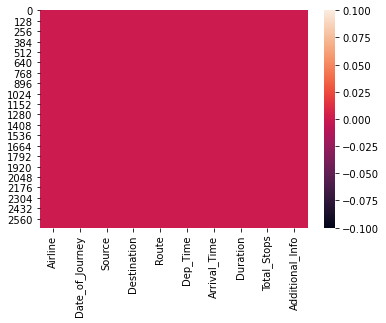

In [128]:
sns.heatmap(testset.isnull())

__From the above heatmap visualization we can observe that there are no white spaces, hence no null values.__

In [129]:
testset.nunique()

Airline             11
Date_of_Journey     44
Source               5
Destination          6
Route              100
Dep_Time           199
Arrival_Time       704
Duration           320
Total_Stops          5
Additional_Info      6
dtype: int64

# Feature Engineering :

In the dataset we can observe columns such as __"Date_of_Journey", "Route", "Dep_Time", "Arrival_Time", "Duration"__ are not in a proper format which can be used for analysis and machine learning models.

Therefore we need to convert them into timestamps using __datetime__ library for proper analysis and prediction.

In [130]:
# To extract the day of journey
testset['Journey_Day']= pd.to_datetime(testset.Date_of_Journey, format="%d/%m/%Y").dt.day

# To extract the month of journey
testset['Journey_Month']= pd.to_datetime(testset.Date_of_Journey, format="%d/%m/%Y").dt.month

# Separate columns for day and month of journey are added to the test dataset.
# Hence, "Date_of_Journey" can be dropped.
testset.drop(['Date_of_Journey'],axis=1,inplace=True)

# Now similarly, we can extract values from "Dep_Time"
# To extract the hour value
testset['Dep_Hour']= pd.to_datetime(testset.Dep_Time).dt.hour

# To extract the minute value
testset['Dep_Min']= pd.to_datetime(testset.Dep_Time).dt.minute

# Separate columns for hour and minute of departure are added to the test dataset.
# Hence, "Dep_Time" can be dropped.
testset.drop(['Dep_Time'],axis=1,inplace=True)

# Similarly, we can extract values from "Arrival_Time"
# To extract the hour value
testset['Arrival_Hour']= pd.to_datetime(testset.Arrival_Time).dt.hour

# To extract the minute value
testset['Arrival_Min']= pd.to_datetime(testset.Arrival_Time).dt.minute

# Separate columns for hour and minute of arrival are added to the test dataset.
# Hence, "Arrival_Time" can be dropped.
testset.drop(['Arrival_Time'],axis=1,inplace=True)

# Now we have to extract values from "Duration"
duration = list(testset["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0])) # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    # Extracts minutes from duration
testset["Duration_hours"] = duration_hours
testset["Duration_mins"] = duration_mins

# Separate columns for hour and minute of duration are added to the test dataset.
# Hence, "Duration" can be dropped.
testset.drop(['Duration'],axis=1,inplace=True)

# Handling "Total_Stops" column
testset.Total_Stops.replace(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'],[0,1,2,3,4],inplace=True)

# Handling Categorical Data :

In [131]:
# Airline feature :
testset["Airline"]=testset["Airline"].replace({'Jet Airways Business': 'Jet Airways'})
testset["Airline"]=testset["Airline"].replace({'Multiple carriers Premium economy': 'Multiple carriers'})
testset["Airline"]=testset["Airline"].replace({'Vistara Premium economy': 'Vistara'})
# Here Airline is nominal data, that is, data is not in any specific order, hence we use OneHotEncoder.
Airline=testset['Airline']
Airline=pd.get_dummies(Airline,drop_first=True)

# Destination
testset['Destination']=testset['Destination'].replace({'New Delhi':'Delhi'})
Destination=testset['Destination']
Destination=pd.get_dummies(Destination,drop_first=True)

# Source
# Here Source is nominal data, that is, data is not in any specific order, hence we use OneHotEncoder.
Source=testset['Source']
Source=pd.get_dummies(Source,drop_first=True)

# Now lets merge all the 3 dataframes into our test dataset :
testset=pd.concat([testset,Airline,Source,Destination],axis=1)


# Therefore now we can drop those 3 columns from the dataset, as we already encoded them.
#'Route' feature is similar to 'Total_Stops', as the route also gives total number of stopages during the whole journey, so it can be dropped.
testset.drop(['Airline','Source','Destination','Route','Additional_Info'],axis=1,inplace=True)

In [132]:
testset.head(1)

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,...,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,1,6,6,17,30,4,25,10,55,0,...,0,0,0,1,0,0,1,0,0,0


In [133]:
# Checking null values in the dataframe

testset.isnull().sum()

Total_Stops          0
Journey_Day          0
Journey_Month        0
Dep_Hour             0
Dep_Min              0
Arrival_Hour         0
Arrival_Min          0
Duration_hours       0
Duration_mins        0
Air India            0
GoAir                0
IndiGo               0
Jet Airways          0
Multiple carriers    0
SpiceJet             0
Vistara              0
Chennai              0
Delhi                0
Kolkata              0
Mumbai               0
Cochin               0
Delhi                0
Hyderabad            0
Kolkata              0
dtype: int64

__There are no missing values present in any of the columns.__

# Detecting Outliers :


Total_Stops             AxesSubplot(0.125,0.772143;0.168478x0.107857)
Journey_Day          AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Journey_Month        AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Dep_Hour             AxesSubplot(0.731522,0.772143;0.168478x0.107857)
Dep_Min                 AxesSubplot(0.125,0.642714;0.168478x0.107857)
Arrival_Hour         AxesSubplot(0.327174,0.642714;0.168478x0.107857)
Arrival_Min          AxesSubplot(0.529348,0.642714;0.168478x0.107857)
Duration_hours       AxesSubplot(0.731522,0.642714;0.168478x0.107857)
Duration_mins           AxesSubplot(0.125,0.513286;0.168478x0.107857)
Air India            AxesSubplot(0.327174,0.513286;0.168478x0.107857)
GoAir                AxesSubplot(0.529348,0.513286;0.168478x0.107857)
IndiGo               AxesSubplot(0.731522,0.513286;0.168478x0.107857)
Jet Airways             AxesSubplot(0.125,0.383857;0.168478x0.107857)
Multiple carriers    AxesSubplot(0.327174,0.383857;0.168478x0.107857)
SpiceJet            

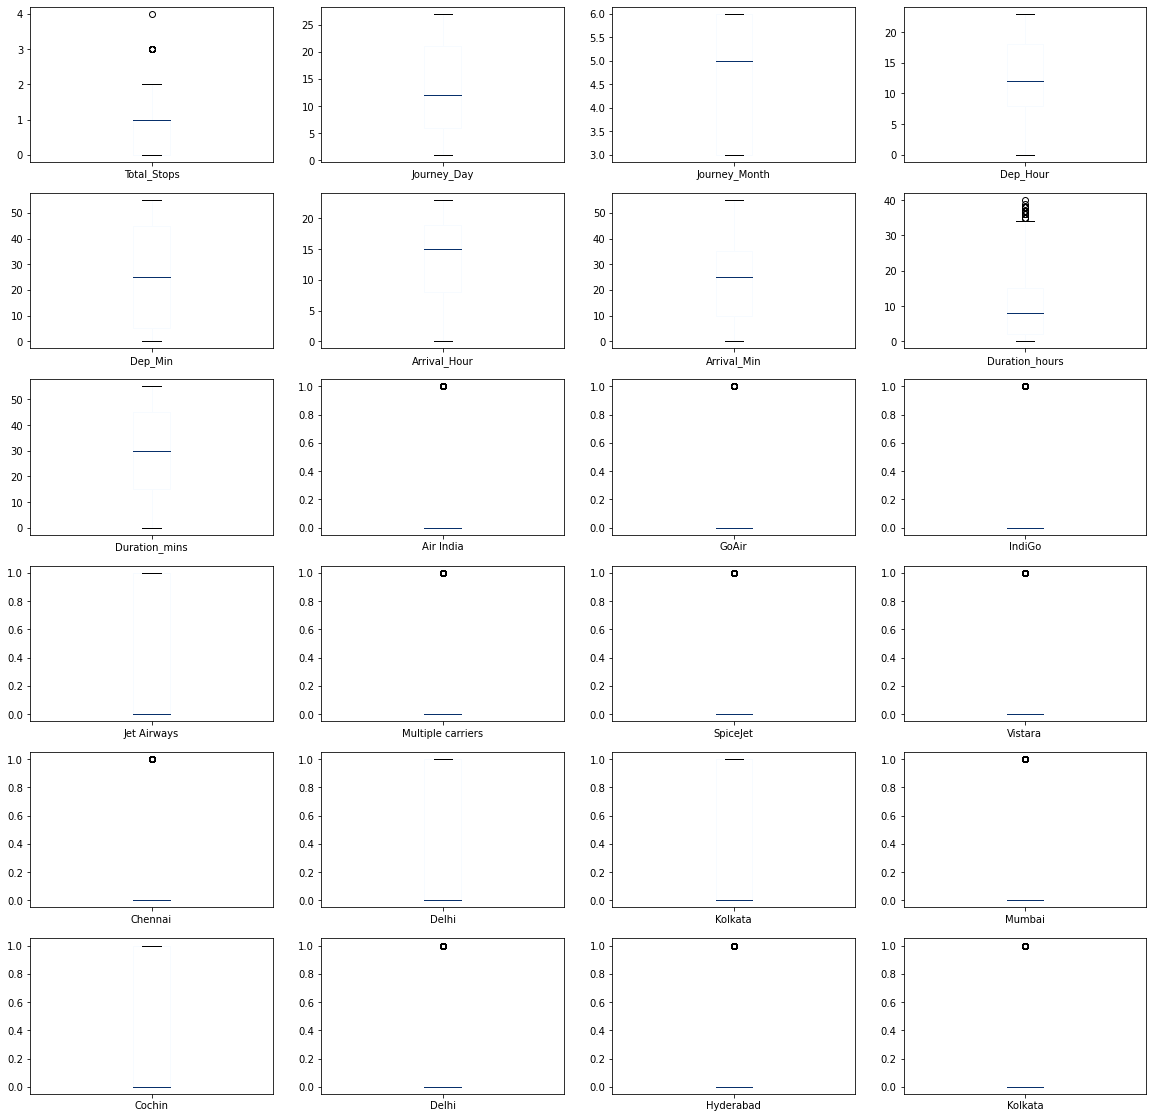

In [134]:
testset.plot(kind='box', subplots=True, layout=(6,4), figsize=(20,20), colormap='Blues')

In [135]:
z=np.abs(zscore(testset))

In [136]:
testset_new=testset[(z<3).all(axis=1)]

In [137]:
print('Shape of original dataframe', testset.shape)

Shape of original dataframe (2671, 24)


In [138]:
print('Shape of dataframe after outliers removal', testset_new.shape)

Shape of dataframe after outliers removal (2084, 24)


# Skewness

In [139]:
testset.skew().sort_values()

Arrival_Hour        -0.443166
Journey_Month       -0.403700
Duration_mins       -0.104482
Dep_Hour             0.093759
Arrival_Min          0.115267
Dep_Min              0.128515
Journey_Day          0.199540
Cochin               0.288396
Delhi                0.288396
Total_Stops          0.321364
Jet Airways          0.692064
Duration_hours       0.884647
Kolkata              1.060800
Delhi                1.441261
IndiGo               1.570462
Air India            1.808687
Multiple carriers    2.188059
SpiceJet             3.152294
Hyderabad            3.383478
Mumbai               3.383478
Vistara              4.178576
Chennai              5.716548
Kolkata              5.716548
GoAir                7.425946
dtype: float64

In [140]:
testset["Duration_hours"] = np.log1p(testset["Duration_hours"])

In [141]:
testset.skew().sort_values()

Arrival_Hour        -0.443166
Journey_Month       -0.403700
Duration_hours      -0.124116
Duration_mins       -0.104482
Dep_Hour             0.093759
Arrival_Min          0.115267
Dep_Min              0.128515
Journey_Day          0.199540
Cochin               0.288396
Delhi                0.288396
Total_Stops          0.321364
Jet Airways          0.692064
Kolkata              1.060800
Delhi                1.441261
IndiGo               1.570462
Air India            1.808687
Multiple carriers    2.188059
SpiceJet             3.152294
Hyderabad            3.383478
Mumbai               3.383478
Vistara              4.178576
Chennai              5.716548
Kolkata              5.716548
GoAir                7.425946
dtype: float64

# Feature Scaling :

In [142]:
scale=StandardScaler()
testset=pd.DataFrame(scale.fit_transform(testset), columns=testset.columns)
testset.head(10)

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,...,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,0.247853,-0.837333,1.094745,0.773265,0.267704,-1.361709,0.026340,0.358374,1.588723,-0.444096,...,-0.290603,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972
1,0.247853,-0.110877,0.240505,-1.161445,-0.256324,-0.509324,-0.271771,-0.587093,-1.695935,-0.444096,...,-0.290603,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972
2,0.247853,0.978807,0.240505,1.125030,-0.518338,0.769252,-1.464213,1.293889,0.991512,-0.444096,...,-0.290603,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972
3,0.247853,0.978807,0.240505,-0.809679,-1.304381,1.053380,-1.464213,0.647560,-1.695935,-0.444096,...,-0.290603,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972
4,-1.239823,1.342035,1.094745,1.828561,1.577774,-1.645837,1.218783,-1.199642,1.290118,-0.444096,...,-0.290603,-0.227101,-0.169972,-0.866215,-0.601714,-0.273586,-0.866215,1.952591,-0.273586,-0.169972
5,0.247853,-0.110877,1.094745,0.949147,-0.518338,-0.225196,0.622561,1.013753,-0.501514,-0.444096,...,-0.290603,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972
6,0.247853,-0.110877,-1.467975,-0.985562,0.267704,1.195444,0.622561,0.807682,-1.397329,2.251767,...,-0.290603,-0.227101,-0.169972,-0.866215,-0.601714,-0.273586,-0.866215,1.952591,-0.273586,-0.169972
7,0.247853,-1.442712,0.240505,0.421499,-0.518338,0.911316,0.324451,-0.368465,-0.800119,-0.444096,...,-0.290603,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972
8,-1.239823,0.252351,-1.467975,-0.457914,-0.780352,-0.225196,1.815004,-1.199642,0.991512,-0.444096,...,-0.290603,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972
9,0.247853,0.615579,0.240505,0.597382,0.267704,1.195444,0.622561,-0.183617,-1.397329,-0.444096,...,-0.290603,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972


# Power Transformation :

In [143]:
power=PowerTransformer(method='yeo-johnson')
testset=pd.DataFrame(power.fit_transform(testset), columns=testset.columns)
testset.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_hours,Duration_mins,Air India,...,SpiceJet,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata
0,0.292261,-0.826738,1.206315,0.788628,0.312687,-1.292336,0.062075,0.313038,1.638316,-0.444096,...,-0.290603,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972
1,0.292261,-0.037135,0.073441,-1.179707,-0.212248,-0.642080,-0.239800,-0.621971,-1.646024,-0.444096,...,-0.290603,-0.227101,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.512140,-0.273586,-0.169972
2,0.292261,0.986181,0.073441,1.116026,-0.486379,0.744335,-1.507518,1.337360,0.994972,-0.444096,...,-0.290603,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972
3,0.292261,0.986181,0.073441,-0.799980,-1.343694,1.136332,-1.507518,0.620979,-1.646024,-0.444096,...,-0.290603,-0.227101,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.512140,-0.273586,-0.169972
4,-1.278340,1.297847,1.206315,1.753981,1.520904,-1.484031,1.203751,-1.180514,1.314779,-0.444096,...,-0.290603,-0.227101,-0.169972,-0.866215,-0.601714,-0.273586,-0.866215,1.952591,-0.273586,-0.169972


# Predictions with new data

In [144]:
price_prediction=RFR.predict(testset)

In [145]:
Prediction = pd.DataFrame()
Prediction['Price']= price_prediction
Prediction

,Price
0,12409.281098
1,4228.716244
2,14504.630911
3,11026.301050
4,4284.628232
...,...
2666,10172.404099
2667,4764.261187
2668,14647.155487
2669,14004.887157


# __<font color="orange">THANK YOU.</font>__